In [2]:
# import the important packages
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
#from sklearn.preprocessing import StandardScale
import os

In [3]:
# define functions

# reads data from an xml-file
def read_data(file):
    with open(file, 'r') as f:
        data = f.read() 
    bs_data = bs(data, 'xml') 
    return bs_data

# abstract out the calculation for euclidian distances
def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    # print(a1)
    return r

# calculates distance based on data, returns a dataframe
def calc_euclidian_distances(bs_data, low, high):
    b_name = bs_data.find_all('name')

    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    #print(attributes)
    
    # finds x-, y- and z-values and computes euclidian distance
    # for first values
    for i in range(low, high):
        r = calc(b_name, i)
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df

def get_lists(low, high):
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            #print(xml_file)
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')
            try:
                df1 = calc_euclidian_distances(bs_data, low, high)
                healthy_list.append(df1)
            except:
                print(xml_file + " failed to compute")

    pfps_list = []
    path = "../usethis/PFPS/"
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            #print(xml_file)
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')
            try:
                df1 = calc_euclidian_distances(bs_data, low, high)
                pfps_list.append(df1)
            except:
                print(xml_file + " failed to compute")
    return healthy_list, pfps_list

In [7]:
healthy_list = []
path = "../usethis/HEALTHY/"
low = 0


level1_healthy, level1_pfps = get_lists(0,int(len(b_name)/4))
            

timeseries-10.xml failed to compute
timeseries-44.xml failed to compute


Text(0, 0.5, 'Lefts')

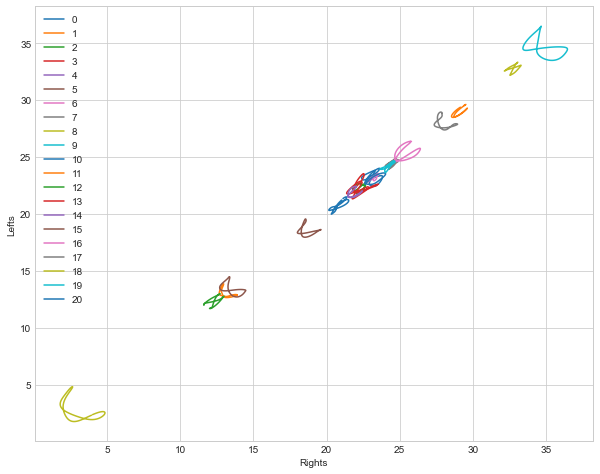

In [8]:
plt.figure(figsize = (10,8))
index = 0

for person in healthy_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

Text(0, 0.5, 'Lefts')

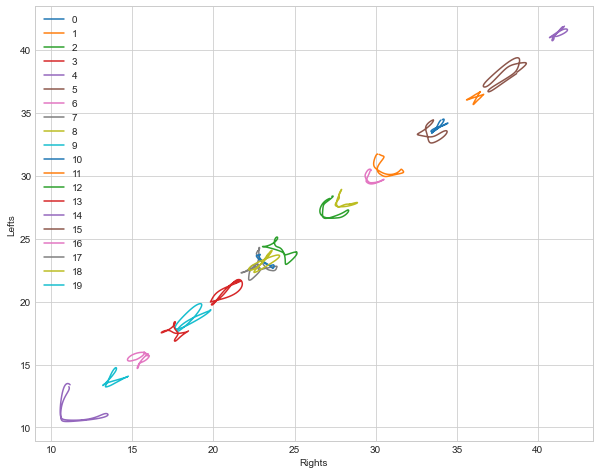

In [9]:
plt.figure(figsize = (10,8))
index = 0

for person in pfps_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

In [ ]:
# mean
i = 0
df_list = []
injurylevel = [0 for i in range(21)]
df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/HEALTHY/"
injury = pd.DataFrame(injurylevel, columns=['injury level'])


for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)
            #print(df1)

            df_list.append(df1)
            i += 1
        except:
            print(xml_file + " failed to compute")

data = pd.concat(df_list)
#df2 = data.join(df)

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {i}")

In [ ]:
df_list = []
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injury = pd.DataFrame([1], columns=['injury level'])
#print(injurylevel)
injury = injurylevel2.append(injurylevel)

df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/PFPS/"
n = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            #print(df1)
            #break
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)


            df_list.append(df1)
            i += 1
            n += 1
        except:
            print(xml_file + " failed to compute")

data2 = pd.concat(df_list)
#df3 = data.join(df)
total = i - n

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {total}")

In [ ]:
# injured = 1, uninjured = 0
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injurylevel = injurylevel2 + injurylevel

injury = pd.DataFrame(injury, columns=['injury level'])
data3 = data.append(data2)
data4 = data3.join(injury)
for attribute in data4:
    print(attribute)

In [ ]:
from matplotlib import pyplot as plt
color = ["r" if i == 0 else "b" for i in injurylevel]

for attribute in data4:
    plt.figure()

    #print(attribute)
    #plot(attribute)
    plt.scatter(np.arange(0,41),data4[attribute], c=color)
    plt.title(attribute)

plt.show

In [ ]:
# standard deviation
i = 0
df_list = []
injurylevel = [0 for i in range(21)]
df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/HEALTHY/"
injury = pd.DataFrame(injurylevel, columns=['injury level'])



for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            df1 = pd.DataFrame(df1.std().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)
            #print(df1)

            df_list.append(df1)
            i += 1
        except:
            print(xml_file + " failed to compute")

data = pd.concat(df_list)
#df2 = data.join(df)

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {i}")

df_list = []
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injury = pd.DataFrame([1], columns=['injury level'])
#print(injurylevel)
injury = injurylevel2.append(injurylevel)

df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/PFPS/"
n = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            df1 = pd.DataFrame(df1.std().to_dict(),index=[df1.index.values[-1]])
            #print(df1)
            #break
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)


            df_list.append(df1)
            i += 1
            n += 1
        except:
            print(xml_file + " failed to compute")

data2 = pd.concat(df_list)
#df3 = data.join(df)
total = i - n

print(f"Length of calculated dataframe: {len(data2)}" )
print(f"Length of how many timeseries-files we have: {total}")

# injured = 1, uninjured = 0
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injurylevel = injurylevel2 + injurylevel

injury = pd.DataFrame(injury, columns=['injury level'])
data3 = data.append(data2)
data4 = data3.join(injury)

In [ ]:
fig,ax = plt.subplots(2,2,figsize = (14,8))
#, c=data4["injury level"]
color = ["r" if i == 0 else "b" for i in injurylevel]

ax[0,0].scatter(np.arange(0,41),data4["Left Pelvic Angles"], c=color)
ax[0,0].set_title("Left Pelvic Angles")

ax[0,1].scatter(np.arange(0,41),data4["Left Knee Angles"], c=color)
ax[0,1].set_title("Left Knee Angles")

In [ ]:
from matplotlib import pyplot as plt


for attribute in data4:
    plt.figure()

    #print(attribute)
    #plot(attribute)
    plt.scatter(np.arange(0,41),data4[attribute], c=color)
    plt.title(attribute)
plt.show

In [34]:
healthy_list1 = []
pfps_list1 = []
path = "../usethis/HEALTHY/"

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        low = 0
        high = int(len(b_name)/4)

        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            healthy_list1.append(df1)
        except:
            print(xml_file + " failed to compute")

pfps_list1 = []
path = "../usethis/PFPS/"
for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            pfps_list1.append(df1)
        except:
            print(xml_file + " failed to compute")


timeseries-10.xml failed to compute
timeseries-44.xml failed to compute


In [35]:
healthy_list2 = []
pfps_list2 = []
path = "../usethis/HEALTHY/"

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        low = int(len(b_name)/4)
        high = int(len(b_name)/2)

        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            healthy_list2.append(df1)
        except:
            print(xml_file + " failed to compute")

pfps_list = []
path = "../usethis/PFPS/"
for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            pfps_list2.append(df1)
        except:
            print(xml_file + " failed to compute")


timeseries-10.xml failed to compute


In [36]:
healthy_list3 = []
pfps_list3 = []
path = "../usethis/HEALTHY/"

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        low = int(len(b_name)/2)
        high = 3*int(len(b_name)/4)

        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            healthy_list3.append(df1)
        except:
            print(xml_file + " failed to compute")

pfps_list = []
path = "../usethis/PFPS/"
for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            pfps_list3.append(df1)
        except:
            print(xml_file + " failed to compute")


timeseries-10.xml failed to compute


In [37]:
healthy_list4 = []
pfps_list4 = []
path = "../usethis/HEALTHY/"

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        low = 3*int(len(b_name)/4)
        high = len(b_name)

        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            healthy_list4.append(df1)
        except:
            print(xml_file + " failed to compute")

pfps_list = []
path = "../usethis/PFPS/"
for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name' )       
        low = 3*int(len(b_name)/4)
        high = len(b_name)

        try:
            df1 = calc_euclidian_distances(bs_data, low, high)
            pfps_list4.append(df1)
        except:
            print(xml_file + " failed to compute")


timeseries-10.xml failed to compute
timeseries-23.xml failed to compute


In [16]:
healthy_list2

[     Head Angles  L_FCC_VLab  L_FM2_VLab  Left Ankle Angles  \
 0      19.950028   73.626562   61.104545          12.162005   
 1      19.852025   73.330409   60.463105          12.272540   
 2      19.756323   73.077908   59.887975          12.443953   
 3      19.665559   72.872865   59.382099          12.668786   
 4      19.581693   72.718937   58.948989          12.935363   
 ..           ...         ...         ...                ...   
 96     20.049936   75.100446   64.215627          12.331413   
 97     19.985372   74.675317   63.352068          12.212912   
 98     19.908603   74.275406   62.539045          12.135096   
 99     19.823348   73.905080   61.780260          12.107112   
 100    19.733548   73.569401   61.080180          12.136521   
 
      Left Foot Contact Angle  Left Foot Progression  Left Hip Angles  \
 0                  30.885241              30.885241       106.063080   
 1                  29.289481              29.289481       106.189143   
 2         

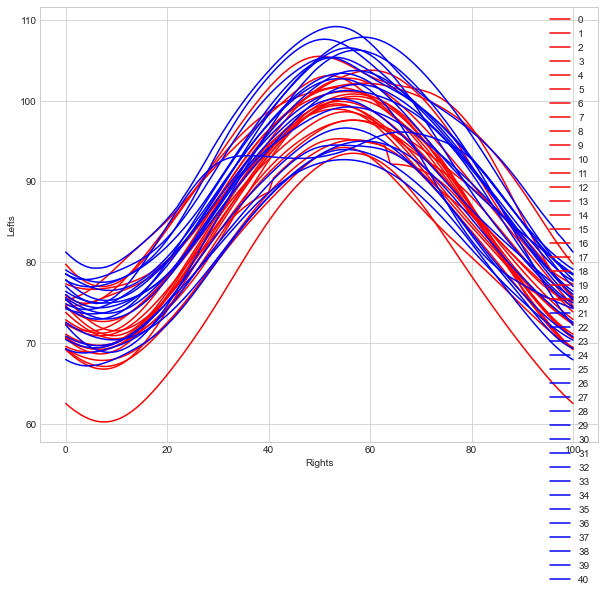

In [38]:
plt.figure(figsize = (10,8))
index = 0

for person in healthy_list4:
    try: 
        plt.plot(person['R_FCC_VLab'], label = index, color="r")
    except: 
        print("fail :(")
    index += 1

for person in pfps_list4:
    try: 
        plt.plot(person['R_FCC_VLab'], label = index, color="b")
    except: 
        print("fail :(")
    index += 1
plt.legend()
#plt.ylim(80,110)
plt.xlabel('Rights')
plt.ylabel('Lefts')
plt.savefig('foo.png')


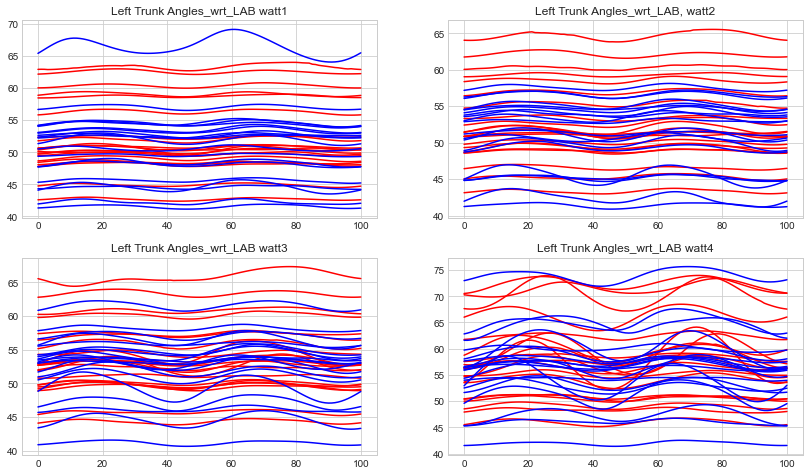

In [49]:
fig,ax = plt.subplots(2,2,figsize = (14,8))
#, c=data4["injury level"]

for person in healthy_list1:
    try: 
        ax[0,0].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="r")
        ax[0,0].set_title("Left Trunk Angles_wrt_LAB watt1")
    except: 
        print("fail :(")
    index += 1
for person in pfps_list1:
    try: 
        ax[0,0].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="b")
        ax[0,0].set_title("Left Trunk Angles_wrt_LAB watt1")
    except: 
        print("fail :(")
    index += 1

for person in healthy_list2:
    try: 
        ax[0,1].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="r")
        ax[0,1].set_title("Left Trunk Angles_wrt_LAB, watt2")
    except: 
        print("fail :(")
    index += 1
for person in pfps_list2:
    try: 
        ax[0,1].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="b")
        ax[0,1].set_title("Left Trunk Angles_wrt_LAB, watt2")
    except: 
        print("fail :(")
    index += 1
    
    
    
for person in healthy_list3:
    try: 
        ax[1,0].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="r")
        ax[1,0].set_title("Left Trunk Angles_wrt_LAB, watt3")
    except: 
        print("fail :(")
    index += 1
for person in pfps_list3:
    try: 
        ax[1,0].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="b")
        ax[1,0].set_title("Left Trunk Angles_wrt_LAB watt3")
    except: 
        print("fail :(")
    index += 1
    
    
    
for person in healthy_list4:
    try: 
        ax[1,1].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="r")
        ax[1,1].set_title("Left Trunk Angles_wrt_LAB watt4")
    except: 
        print("fail :(")
    index += 1
for person in pfps_list4:
    try: 
        ax[1,1].plot(person['Left Trunk Angles_wrt_LAB'],label = index, color="b")
        ax[1,1].set_title("Left Trunk Angles_wrt_LAB watt4")
    except: 
        print("fail :(")
    index += 1
